### Тема "Обучение с учителем"

#### Задание 1

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.
Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model.
Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.
Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.


In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

In [17]:
from sklearn.datasets import load_boston 

In [18]:
boston = load_boston()

In [19]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [20]:
data = boston.data
target = boston.target

In [21]:
feature_names = boston.feature_names

In [22]:
X = pd.DataFrame(data, columns = feature_names)

In [23]:
y = pd.DataFrame(target, columns = ['price'])

In [24]:
def r2_lr_count(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred_lr = lr.predict(X_test)
    check_test = pd.DataFrame({'y_test': y_test['price'],
                           'y_pred_lr': y_pred_lr.flatten()})
    r2_lr = r2_score(y_test, y_pred_lr)
    print(check_test.head())
    print(f'\n Метрика r2_score по результату обучения модели Линейной Регрессии = {r2_lr}')

In [25]:
r2_lr_count(X, y)

     y_test  y_pred_lr
173    23.6  28.648960
274    32.4  36.495014
491    13.6  15.411193
72     22.8  25.403213
452    16.1  18.855280

 Метрика r2_score по результату обучения модели Линейной Регрессии = 0.7112260057484948


#### Задание 2

Создайте модель под названием model с помощью RandomForestRegressor из модуля sklearn.ensemble.
Сделайте агрумент n_estimators равным 1000,
max_depth должен быть равен 12 и random_state сделайте равным 42.
Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression,
но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0],
чтобы получить из датафрейма одномерный массив Numpy,
так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма.
Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из предыдущего задания.
Напишите в комментариях к коду, какая модель в данном случае работает лучше.


In [26]:
rf = RandomForestRegressor(n_estimators = 100, max_depth = 12, random_state = 42)

In [27]:
def r2_rf_count(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    check_test = pd.DataFrame({'y_test': y_test['price'],
                           'y_pred_rf': y_pred_rf.flatten()})
    r2_rf = r2_score(y_test, y_pred_rf)
    print(check_test.head())
    print(f'\n Метрика r2_score по результату обучения модели Случайного леса = {r2_rf}')


In [28]:
r2_rf_count(X, y)

     y_test  y_pred_rf
173    23.6  22.994614
274    32.4  31.165000
491    13.6  15.929500
72     22.8  24.266608
452    16.1  16.987542

 Метрика r2_score по результату обучения модели Случайного леса = 0.8713629100115731


**Коэффициент детерминации модели Случайного леса выше, следовательно данная модель дала более точный прогноз**

#### Задание 3*

Вызовите документацию для класса RandomForestRegressor,
найдите информацию об атрибуте feature_importances_.
С помощью этого атрибута найдите сумму всех показателей важности,
установите, какие два признака показывают наибольшую важность.


In [29]:
?RandomForestRegressor

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
feature_importances = pd.DataFrame(zip(X_train.columns, rf.feature_importances_), columns = ['feature_name', 'importance'])
feature_importances

,feature_name,importance
0,CRIM,0.031561
1,ZN,0.001580
2,INDUS,0.006321
3,CHAS,0.001955
4,NOX,0.012182
5,RM,0.439920
6,AGE,0.011699
7,DIS,0.065599
8,RAD,0.004973
9,TAX,0.012047


In [32]:
feature_importances['importance'].sum()

1.0

In [33]:
feature_importances.nlargest(2, 'importance')

,feature_name,importance
5,RM,0.439920
12,LSTAT,0.380769


#### Задание 4*

* Импортируйте из соответствующих модулей RandomForestClassifier, GridSearchCV и train_test_split.
Загрузите датасет creditcard.csv и создайте датафрейм df.
* С помощью метода value_counts с аргументом normalize=True убедитесь в том, что выборка несбалансирована.Используя метод info, проверьте, все ли столбцы содержат числовые данные и нет ли в них пропусков.Примените следующую настройку, чтобы можно было просматривать все столбцы датафрейма:
pd.options.display.max_columns = 100.
Просмотрите первые 10 строк датафрейма df.
Создайте датафрейм X из датафрейма df, исключив столбец Class.
Создайте объект Series под названием y из столбца Class.


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [35]:
df = pd.read_csv('creditcard.csv')

In [36]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Объектов первого класса существенное меньше, чем объектов нулевого класса, выборка несбалансирована

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Значения содержат числовые значения, пропусков нет

In [38]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [39]:
pd.options.display.max_columns = 100

In [40]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [41]:
X = df.drop('Class', axis = 1)
y = df['Class']

*Разбейте X и y на тренировочный и тестовый наборы данных при помощи функции train_test_split, используя аргументы: test_size=0.3, random_state=100, stratify=y.
У вас должны получиться объекты X_train, X_test, y_train и y_test.
Просмотрите информацию о их форме.
Для поиска по сетке параметров задайте такие параметры:
parameters = [{'n_estimators': [10, 15],
'max_features': np.arange(3, 5),
'max_depth': np.arange(4, 7)}]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100, stratify = y)

In [43]:
print('X_train shape - ', X_train.shape)
print('X_test shape -', X_test.shape)
print('y_train shape -', y_train.shape)
print('y_test shape - ', y_test.shape)

X_train shape -  (199364, 30)
X_test shape - (85443, 30)
y_train shape - (199364,)
y_test shape -  (85443,)


In [44]:
parameters = [{'n_estimators': [10, 15], 
               'max_features': np.arange(3, 5), 
               'max_depth': np.arange(4, 7)}]

*Создайте модель GridSearchCV со следующими аргументами:
estimator=RandomForestClassifier(random_state=100),
param_grid=parameters,
scoring='roc_auc',
cv=3.
Обучите модель на тренировочном наборе данных (может занять несколько минут).
Просмотрите параметры лучшей модели с помощью атрибута best_params_.
Предскажите вероятности классов с помощью полученнной модели и метода predict_proba.
Из полученного результата (массив Numpy) выберите столбец с индексом 1 (вероятность класса 1) и запишите в массив y_pred_proba. Из модуля sklearn.metrics импортируйте метрику roc_auc_score.
Вычислите AUC на тестовых данных и сравните с результатом,полученным на тренировочных данных, используя в качестве аргументов массивы y_test и y_pred_proba.



In [45]:
clf = GridSearchCV(estimator = RandomForestClassifier(random_state = 100),
                  param_grid = parameters,
                  scoring = 'roc_auc',
                  cv = 3)

In [46]:
clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=100),
             param_grid=[{'max_depth': array([4, 5, 6]),
                          'max_features': array([3, 4]),
                          'n_estimators': [10, 15]}],
             scoring='roc_auc')

In [47]:
clf.best_params_

{'max_depth': 6, 'max_features': 3, 'n_estimators': 15}

In [48]:
y_pred_proba = clf.predict_proba(X_test)[:,1]

In [49]:
y_pred_proba[:10]

array([0.00092917, 0.00029521, 0.00028215, 0.00028215, 0.00028215,
       0.00028215, 0.00028215, 0.00028215, 0.00028215, 0.00028215])

In [50]:
from sklearn.metrics import roc_auc_score

In [51]:
roc_auc_score(y_test, y_pred_proba)

0.9462664156037156

### Дополнительные задания *

1). Загрузите датасет Wine из встроенных датасетов sklearn.datasets с помощью функции load_wine в переменную data.

In [52]:
from sklearn.datasets import load_wine 

In [53]:
data = load_wine()

2). Полученный датасет не является датафреймом. Это структура данных, имеющая ключи аналогично словарю. Просмотрите тип данных этой структуры данных и создайте список data_keys, содержащий ее ключи.

In [54]:
type(data)

sklearn.utils.Bunch

In [55]:
data_keys = data.keys()
data_keys

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

3). Просмотрите данные, описание и названия признаков в датасете. Описание нужно вывести в виде привычного, аккуратно оформленного текста, без обозначений переноса строки, но с самими переносами и т.д3). Просмотрите данные, описание и названия признаков в датасете. Описание нужно вывести в виде привычного, аккуратно оформленного текста, без обозначений переноса строки, но с самими переносами и т.д

In [56]:
data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [57]:
for line in data.DESCR.split('\n'):
    print(line)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

4). Сколько классов содержит целевая переменная датасета? Выве
дите названия классов.

In [58]:
np.unique(data.target).sum()

3

In [59]:
np.unique(data.target)

array([0, 1, 2])

3 уникальных значения - 0, 1 и 2

5). На основе данных датасета (они содержатся в двумерном массиве Numpy) и названий признаков создайте датафрейм под названием X.


In [60]:
X = pd.DataFrame(data.data, columns = data.feature_names)
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


6). Выясните размер датафрейма X и установите, имеются ли в нем пропущенные значения.

In [61]:
print(f'В датафрейме X - {X.shape[0]} строк и  {X.shape[1]} столбцов')

В датафрейме X - 178 строк и  13 столбцов


In [62]:
X.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

Пропущенных значений нет

7). Добавьте в датафрейм поле с классами вин в виде чисел, имеющих тип данных numpy.int64. Название поля - 'target'.

In [63]:
X['target'] = 0
X['target'].dtype

dtype('int64')

In [64]:
#Если бы потребовалось изменить тип:
#X['target'].astype('int64')

8). Постройте матрицу корреляций для всех полей X. Дайте полученному датафрейму название X_corr.


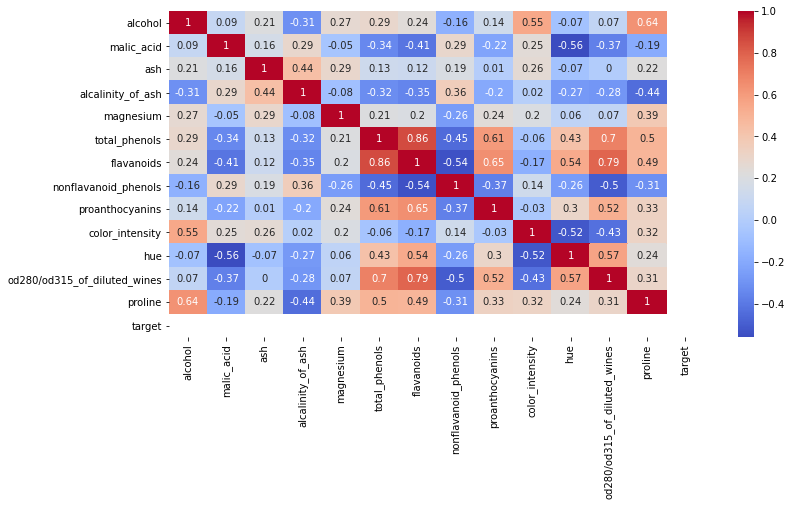

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
X_corr = X.corr()
X_corr = np.round(X_corr, 2)
plt.figure(figsize = (12, 6))
sns.heatmap(X_corr, annot = True, cmap = 'coolwarm')
plt.show()

9). Создайте список high_corr из признаков, корреляция которых с полем target по абсолютному значению превышает 0.5 (причем, само поле target не должно входить в этот список).


In [80]:
X_corr.index

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

In [84]:
high_corr = X_corr.loc[(abs(X_corr['target']) > 0.5) & (X_corr.index != 'target'), X_corr.columns != 'target'].columns
high_corr

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

10). Удалите из датафрейма X поле с целевой переменной. Для всех признаков, названия которых содержатся в списке high_corr, вычислите квадрат их значений и добавьте в датафрейм X соответствующие поля с суффиксом '_2', добавленного к первоначальному названию признака. Итоговый датафрейм должен содержать все поля, которые, были в нем изначально, а также поля с признаками из списка high_corr, возведенными в квадрат. Выведите описание полей датафрейма X с помощью метода describe.

In [76]:
X = X.drop('target', axis = 1)

In [89]:
for feature_name in high_corr:
    X[f'{feature_name}_2'] = X[feature_name]**2

In [90]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,alcohol_2,malic_acid_2,ash_2,alcalinity_of_ash_2,magnesium_2,total_phenols_2,flavanoids_2,nonflavanoid_phenols_2,proanthocyanins_2,color_intensity_2,hue_2,od280/od315_of_diluted_wines_2,proline_2
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,202.4929,2.9241,5.9049,243.36,16129.0,7.8400,9.3636,0.0784,5.2441,31.8096,1.0816,15.3664,1134225.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,174.2400,3.1684,4.5796,125.44,10000.0,7.0225,7.6176,0.0676,1.6384,19.1844,1.1025,11.5600,1102500.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,173.1856,5.5696,7.1289,345.96,10201.0,7.8400,10.4976,0.0900,7.8961,32.2624,1.0609,10.0489,1404225.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,206.4969,3.8025,6.2500,282.24,12769.0,14.8225,12.1801,0.0576,4.7524,60.8400,0.7396,11.9025,2190400.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,175.2976,6.7081,8.2369,441.00,13924.0,7.8400,7.2361,0.1521,3.3124,18.6624,1.0816,8.5849,540225.0
